## K-mean++ 

### Imports

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [26]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values # In order to visualize the result we need a two dimensions (income, spending score)

### Using the elbow method to find the optimal number of clusters

In [27]:
from sklearn.cluster import KMeans
# Within-Cluster Sum of Squares, sum of squared distances 
# to the closest centroid for all observations in the training set
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

### Draw the plot to visualize the elbow method

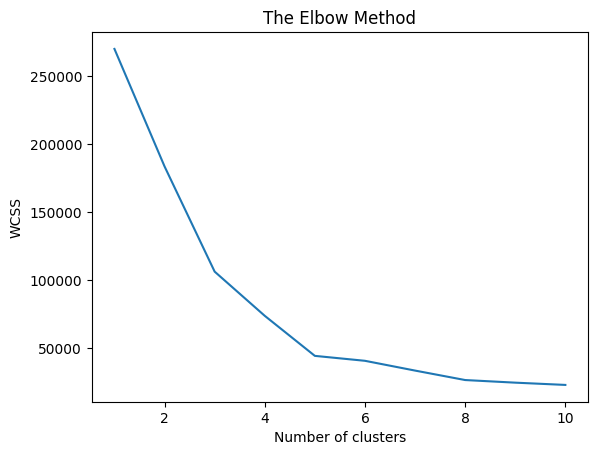

In [28]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Training the K-Means model on the dataset

In [32]:
# We use n_clusters=5 according to the plot above
clusters = 5
kmeans = KMeans(n_clusters = clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X) # Contains cluster index for each customer

### Visualizing the clusters

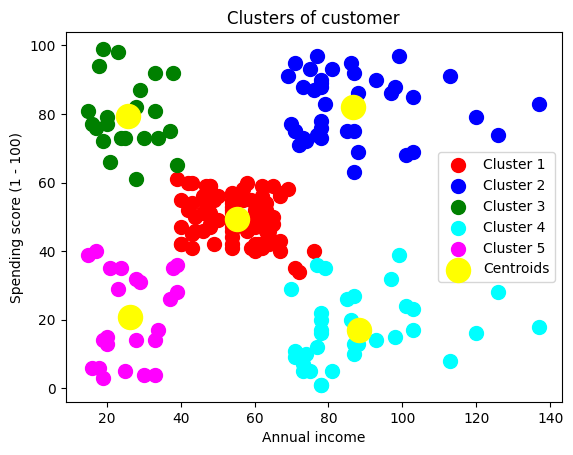

In [31]:
colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'cyan',
    4: 'magenta',
}
for i in range(0, clusters):
    plt.scatter(X[y_kmeans == i, 0], 
                X[y_kmeans == i, 1], 
                s=100, c=colors.get(i), label='Cluster {}'.format(i + 1))
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids')
plt.xlabel('Annual income'),
plt.ylabel('Spending score (1 - 100)')
plt.title('Clusters of customer'),
plt.legend()
plt.show()